# Business Problem: Predicting Customer Lifetime Value (CLV)

Customer Lifetime Value (CLV) is a crucial business metric that estimates the total amount of revenue that a customer is expected to generate over their entire lifetime. The higher the CLV, the more valuable the customer is to the business. By predicting the CLV of each customer, a bank can identify its most valuable customers and focus its marketing and retention efforts on them. This can help the bank increase customer loyalty, reduce churn, and improve its overall profitability.

## Data mining technique used: Regression Analysis

Regression analysis can be used to predict the CLV of each customer. By using the demographic and transactional data of customers from the given dataset, we can train a regression model to predict the total amount of revenue that each customer is expected to generate over their entire lifetime. We can use features such as age, income, transaction history, and location to train the model. Once the model is trained, we can use it to predict the CLV of new customers and identify the most valuable ones.


## Data Description 
<strong>transactions.csv</strong> has the following data:-
<ul>
<li>category</li>
<li>amt</li>
<li>is_fraud</li>
<li>acct_num</li>
<li>trans_num</li>
<li>cc_num</li>
<li>merchant_name</li>
<li>merch_lat</li>
<li>merch_long</li>
<li>unixtime</li>
</ul>

<strong>customer.csv</strong> has the following data:-
<ul>
<li>first</li>
<li>last</li>
<li>gender</li>
<li>ssn</li>
<li>street</li>
<li>city</li>
<li>state</li>
<li>zip</li>
<li>lat</li>
<li>long</li>
<li>city_pop</li>
<li>job</li>
<li>dob</li>
<li>acct_num</li>
</ul>


Here are the steps to build a Machine Learning Model for predicting CLV:

### Step 1: Importing required libraries and packages

In [1]:
import pandas as pd
import glob
import os
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### If you have 'customers.csv', 'transactions.csv' and 'merged_data.csv', just load them and skip to step 3

### Step 2: Data Preprocessing

1. Load the transactional data from the CSV files.

In [ ]:
def process_transactions_files():
    for i in range(132):
        # Generate the filename
        filename = f'dataset/transactions_{i}.csv'
        
        # Load CSV file
        df = pd.read_csv(filename, delimiter='|')

        # Print the DataFrame
        print(f'{filename}:')
        print(df)

        # Save the DataFrame to a new CSV file
        new_filename = f'dataset/new_transactions_{i}.csv'
        df.to_csv(new_filename, index=False)

process_transactions_files()

2. Merge the all the transactional data into one file


In [ ]:
# Define the directory where the files are located
directory = "dataset"

# Define the filename for the merged file
merged_filename = "transactions.csv"

# Create a CSV writer object with '|' as the delimiter for the merged file
with open(os.path.join(directory, merged_filename), 'w', newline='') as outfile:
    writer = csv.writer(outfile, delimiter='|')
    
    # Loop through all the files that match the pattern
    for filename in glob.glob(directory + "/transactions_[0-9]*.csv"):
        # Open the file for reading
        with open(filename, 'r') as infile:
            # Create a CSV reader object with '|' as the delimiter
            reader = csv.reader(infile, delimiter='|')
            
            # Loop through each row in the file and write it to the merged file
            for row in reader:
                writer.writerow(row)

trans= pd.read_csv('dataset/transactions.csv', delimiter='|')
trans.to_csv('transactions.csv', index=False)
trans

3. Remove any unnecessary columns and handle missing or inconsistent data.

In [ ]:
trans.dropna()

4. Loading customer data from CSV file

In [ ]:
# Load CSV file
df = pd.read_csv('dataset/customers.csv', delimiter='|')
# Print the DataFrame
print(df)
# Save the DataFrame to a new CSV file
df.to_csv('customers.csv', index=False)

In [ ]:
cus= pd.read_csv('customers.csv')
cus.dropna()
cus

In [2]:
trans = pd.read_csv('transactions.csv')
cus = pd.read_csv('customers.csv')

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_18713/2234585526.py:1: DtypeWarning: Columns (0,1,3,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv('transactions.csv')


5. Checking for null values

In [ ]:
null_values_trans = trans.isnull().sum()
print("transactions.csv:")
print(null_values_trans, end='\n\n')
print("customers.csv:")
null_values_cus = cus.isnull().sum()
print(null_values_cus)

6. Checking data types for each column

In [ ]:
print("Data type of each column in transactions.csv:")
print(trans.dtypes, end="\n\n")
print("Data type of each column in customers.csv:")
print(cus.dtypes, end="\n\n")

7. Mearging both csv files into one file

In [ ]:
merged_data = pd.merge(trans, cus, on="acct_num")
print(merged_data.columns)
merged_data.to_csv('merged_data.csv', index=False)
null_values_merged_data = merged_data.isnull().sum()
print(null_values_merged_data)

### Step 3: Feature Engineering

1. Dropping unwanted columns

In [3]:
# Drop unnecessary columns
#merged_data.drop(['trans_num', 'cc_num_x', 'cc_num_y', 'merchant'], axis=1, inplace=True)
# Handle missing values
merged_data = pd.read_csv('merged_data.csv')
merged_data.fillna(0, inplace=True)

In [ ]:
merged_data

2. Ploting graphs

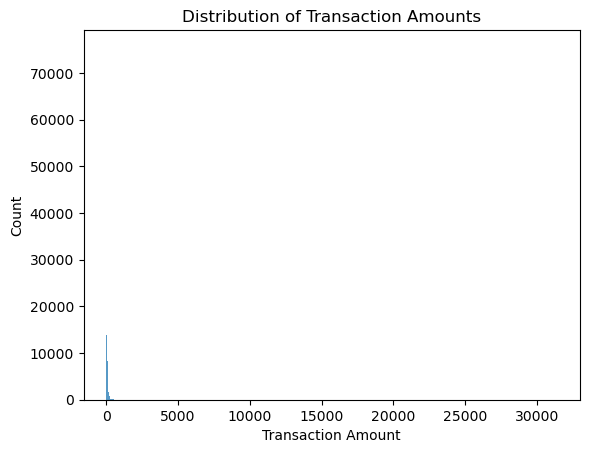

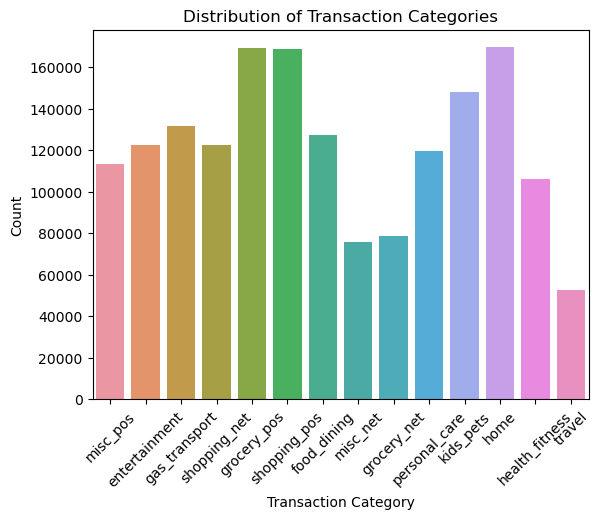

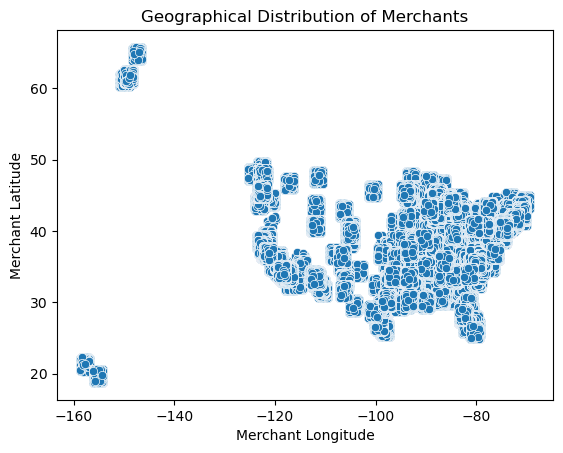

In [4]:
# Plot a histogram of transaction amounts
sns.histplot(data=merged_data, x='amt')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts')
plt.show()

# Plot a bar chart of transaction categories
sns.countplot(data=merged_data, x='category')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.title('Distribution of Transaction Categories')
plt.xticks(rotation=45)
plt.show()

# Plot a scatter plot of latitude and longitude of merchants
sns.scatterplot(data=merged_data, x='merch_long', y='merch_lat')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.title('Geographical Distribution of Merchants')
plt.show()

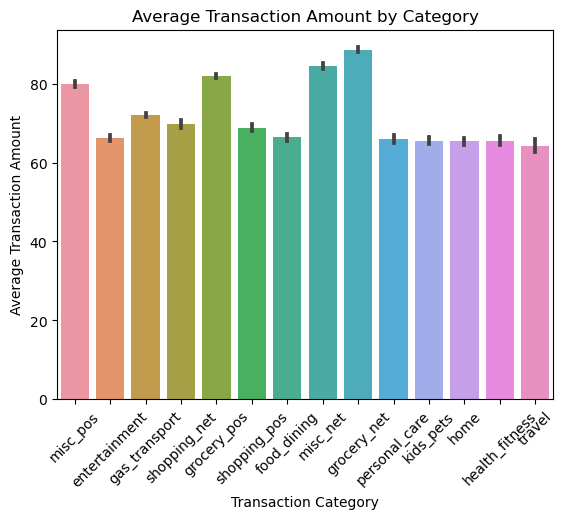

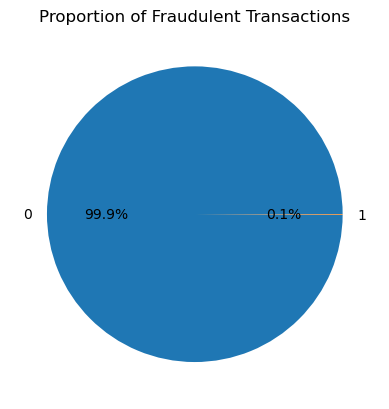

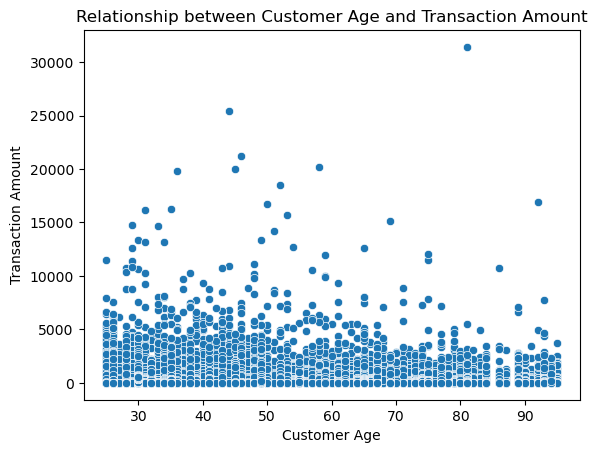

In [5]:
# Plot a bar chart of transaction categories with average transaction amount
sns.barplot(data=merged_data, x='category', y='amt')
plt.xlabel('Transaction Category')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Category')
plt.xticks(rotation=45)
plt.show()

# Plot a pie chart of transaction fraud proportions
fraud_counts = merged_data['is_fraud'].value_counts()
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Fraudulent Transactions')
plt.show()

# Plot a scatter plot of customer age (derived from 'dob') and transaction amount
merged_data['dob'] = pd.to_datetime(merged_data['dob'])
merged_data['age'] = (pd.to_datetime('today') - merged_data['dob']).astype('<m8[Y]')
sns.scatterplot(data=merged_data, x='age', y='amt')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount')
plt.title('Relationship between Customer Age and Transaction Amount')
plt.show()


3. Creating new features from the existing data that could be useful in predicting CLV

i. Frequency of Transactions: Calculate the total number of transactions made by each customer.

In [6]:
transaction_frequency = merged_data.groupby('acct_num')['trans_num'].count().reset_index()
transaction_frequency.rename(columns={'trans_num': 'transaction_frequency'}, inplace=True)
merged_data = pd.merge(merged_data, transaction_frequency, on='acct_num', how='left')

ii. Average Transaction Amount: Calculate the average transaction amount for each customer.

In [7]:
average_transaction_amount = merged_data.groupby('acct_num')['amt'].mean().reset_index()
average_transaction_amount.rename(columns={'amt': 'average_transaction_amount'}, inplace=True)
merged_data = pd.merge(merged_data, average_transaction_amount, on='acct_num', how='left')

iii. Total Transaction Amount: Calculate the total transaction amount for each customer.

In [8]:
total_transaction_amount = merged_data.groupby('acct_num')['amt'].sum().reset_index()
total_transaction_amount.rename(columns={'amt': 'total_transaction_amount'}, inplace=True)
merged_data = pd.merge(merged_data, total_transaction_amount, on='acct_num', how='left')

iv. Time since First Transaction: Calculate the time duration since the first transaction for each customer.

In [9]:
merged_data['unix_time'] = pd.to_datetime(merged_data['unix_time'], unit='s')
first_transaction_time = merged_data.groupby('acct_num')['unix_time'].min().reset_index()
first_transaction_time['time_since_first_transaction'] = (pd.to_datetime('today') - first_transaction_time['unix_time']).dt.days
merged_data = pd.merge(merged_data, first_transaction_time[['acct_num', 'time_since_first_transaction']], on='acct_num', how='left')

4. Creating a CLV cloumn based on 'average_transaction_amount' and 'transaction_frequency'

CLV can be calculated in various ways, depending on the specific business context and available data. Here we will be creating CLV column based on the average transaction amount and the frequency of transactions

In [10]:
# Calculate CLV
merged_data['CLV'] = merged_data['average_transaction_amount'] * merged_data['transaction_frequency']
merged_data['CLV']

0          123080.32
1          123080.32
2          123080.32
3          123080.32
4          123080.32
             ...    
1705126    169742.40
1705127    169742.40
1705128    169742.40
1705129    169742.40
1705130    169742.40
Name: CLV, Length: 1705131, dtype: float64

6. Ploting graphs based on new features

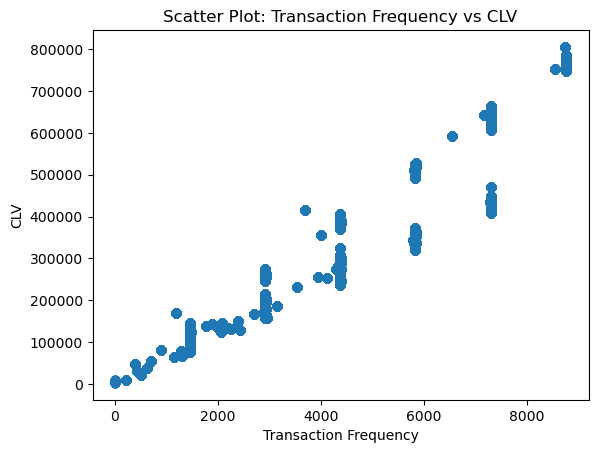

In [11]:
import matplotlib.pyplot as plt

# Plot scatter plot
plt.scatter(merged_data['transaction_frequency'], merged_data['CLV'])
plt.xlabel('Transaction Frequency')
plt.ylabel('CLV')
plt.title('Scatter Plot: Transaction Frequency vs CLV')
plt.show()

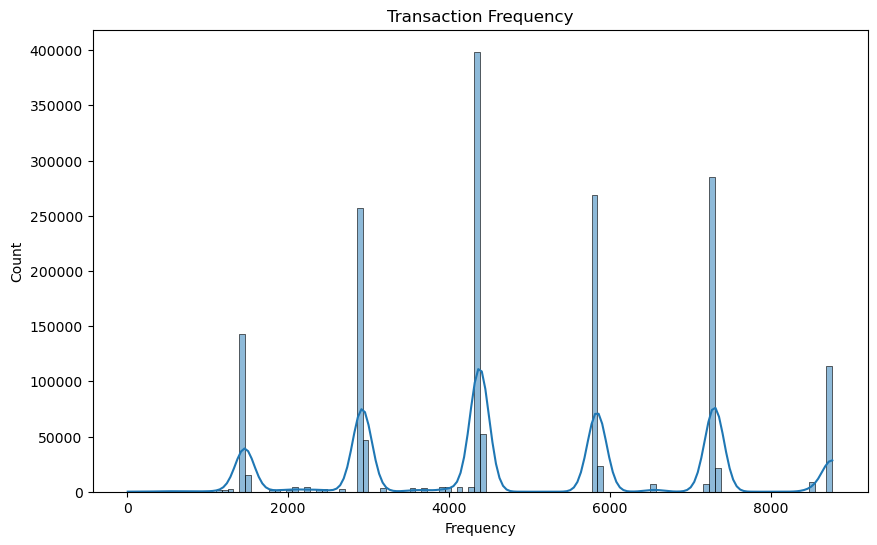

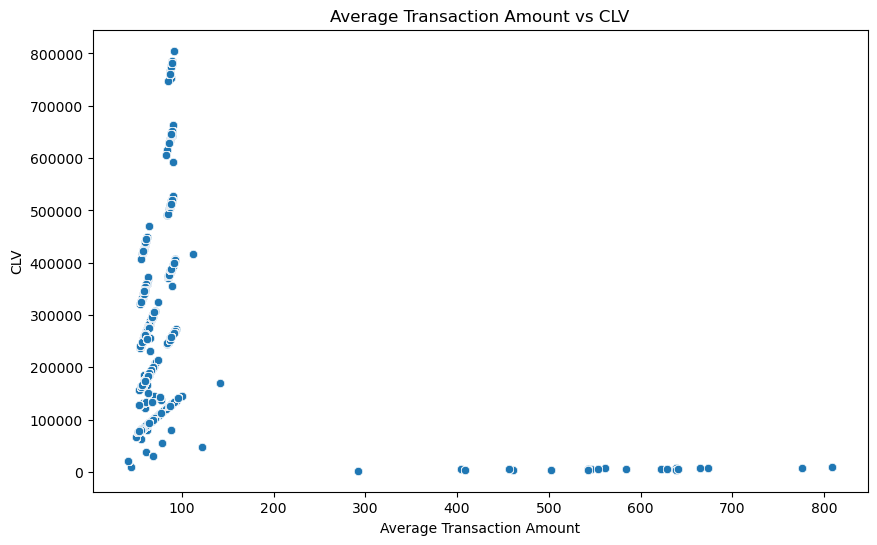

In [12]:
# Plot histogram of transaction frequency
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='transaction_frequency', kde=True)
plt.title('Transaction Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# Plot scatter plot of average transaction amount vs CLV
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='average_transaction_amount', y='CLV')
plt.title('Average Transaction Amount vs CLV')
plt.xlabel('Average Transaction Amount')
plt.ylabel('CLV')
plt.show()


The first graph plots a histogram of the transaction frequency, showing the distribution of customer transaction frequencies. The second graph plots a scatter plot of the average transaction amount on the x-axis and the CLV on the y-axis, allowing you to visualize the relationship between these two variables.

### Step 4: Model Training

In [ ]:
merged_data

1. Creating a Linear Regression Model using new features

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = merged_data[['transaction_frequency', 'total_transaction_amount', 'average_transaction_amount']]
y = merged_data['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model
reg_model = LinearRegression()

# Train the model on the training data
reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = reg_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score, end="\n\n\n\n")

# Print the first 10 predictions
print("Print the first 10 predictions:")
print(y_pred[:10])

Mean Squared Error (MSE): 8.410641433390422e-16
Root Mean Squared Error (RMSE): 2.900110589855225e-08
R-squared (R2) Score: 1.0



Print the first 10 predictions:
[776967.92999996 264583.61000002 132891.38999997 260034.30000002
 338721.26000004 355672.88999997 390193.51999997 398775.40999997
 190180.82       773778.44999996]


2. Tuning the model hyperparameters for better performance of the model

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False]
}

# Create a linear regression model
reg_model = LinearRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(reg_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score, end="\n\n")

# Print the first 10 predictions
print("Print the first 10 predictions:")
print(y_pred[:10])

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error (MSE): 8.410641433390422e-16
Root Mean Squared Error (RMSE): 2.900110589855225e-08
R-squared (R2) Score: 1.0

Print the first 10 predictions:
[776967.92999996 264583.61000002 132891.38999997 260034.30000002
 338721.26000004 355672.88999997 390193.51999997 398775.40999997
 190180.82       773778.44999996]


3. Creating another model using Random Forest

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Separate the features (X) and target variable (y)
X = merged_data[['transaction_frequency', 'total_transaction_amount', 'average_transaction_amount']]
y = merged_data['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = rf_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score)

Mean Squared Error (MSE): 0.0037291912391644744
Root Mean Squared Error (RMSE): 0.06106710439479241
R-squared (R2) Score: 0.999999999999894


4. Tuning the model hyperparameters for better performance of the model

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the random forest
    'max_depth': [None, 5, 10],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

# Create a random forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

KeyboardInterrupt: 

5. Creating another model using Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = merged_data[['transaction_frequency', 'total_transaction_amount', 'average_transaction_amount']]
y = merged_data['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = gb_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score)

Mean Squared Error (MSE): 563135.5159778388
Root Mean Squared Error (RMSE): 750.423557717799
R-squared (R2) Score: 0.9999839929498926


6. Tuning the model hyperparameters for better performance of the model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_score)

### Step 5: Model Deployment
Saving all the models, so that the models are ready for deployment

In [20]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.externals import joblib
import joblib
# Save the GradientBoostingRegressor model
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

# Save the RandomForestRegressor model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save the  Linear Regression model
joblib.dump(reg_model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [ ]:
import joblib
joblib.dump(grid_search, 'grid_search.joblib')